<a href="https://colab.research.google.com/github/souhila98/Reducing-car-hijacking-in-South-Africa-using-machine-learning/blob/main/Omdena_SA_Carjacking_EDA%2BData_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
search_query = "car hijack south africa"
#(from:@stolenvehicleza) until:2022-09-01 since:2016-08-01'
tweets = []
tweet_limit = 10000

for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    if len(tweets) == tweet_limit:
        break
    else:
        tweets.append([tweet.date,tweet.id,tweet.content,tweet.user.username,tweet.retweetCount,tweet.hashtags,tweet.sourceLabel, tweet.user.location])
  
        
df1 = pd.DataFrame(tweets, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Retweet','Hashtags','Source', 'Location'])

df1.to_csv('C:/Users/Pctec/Desktop/southafrica/car_hijack_south_africa.csv')
df1 = pd.read_csv('C:/Users/Pctec/Desktop/southafrica/car_hijack_south_africa.csv')


In [ ]:
search_query = "southafrica hijacking"
#(from:@stolenvehicleza) until:2022-09-01 since:2016-08-01'
tweets = []
tweet_limit = 10000

for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    if len(tweets) == tweet_limit:
        break
    else:
         tweets.append([tweet.date,tweet.id,tweet.content,tweet.user.username,tweet.retweetCount,tweet.hashtags,tweet.sourceLabel, tweet.user.location])
  
        
df2 = pd.DataFrame(tweets, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Retweet','Hashtags','Source', 'Location'])

df2.to_csv('C:/Users/Pctec/Desktop/southafrica/southafrica_hijacking.csv')


In [10]:
#read the path
df1 = pd.read_csv('/content/drive/My Drive/southafrica/car_hijack_south_africa.csv')
df2 = pd.read_csv('/content/drive/My Drive/southafrica/southafrica_hijacking.csv')
file_path = "/content/drive/My Drive/southafrica/"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list

['car_hijack_south_africa.csv', 'southafrica_hijacking.csv']

In [11]:
list = ['Datetime', 'Tweet Id', 'Text', 'Username', 'Retweet','Hashtags','Source', 'Location']
df = df2.merge(df1,on = list, how = 'outer')
print(f'{df.shape[0]} observations, {df.shape[1]} columns')

4856 observations, 10 columns


In [12]:
df= df[['Datetime', 'Tweet Id', 'Text', 'Username', 'Retweet','Hashtags','Source', 'Location']]
df.head()

,Datetime,Tweet Id,Text,Username,Retweet,Hashtags,Source,Location
0,2022-11-23 12:48:29+00:00,1595398883194150916,SA has NEW hijacking hot-spot - and a 305% inc...,TheSAnews,0,NaN,The South African,"London, Cape Town"
1,2022-11-22 19:27:52+00:00,1595137004249157633,@madiba_pinky @Reitu_d @Abramjee In South Afri...,Vho_Mpho,0,NaN,Twitter for Android,"Randburg, South Africa"
2,2022-11-22 14:58:34+00:00,1595069232991326215,Thami Ngubeni Speaks After Scary Robbery &amp;...,ubetoo,0,"['News', 'ThamiNgubeni']",dlvr.it,South Africa
3,2022-11-16 23:49:42+00:00,1593028569932136449,@VehicleTrackerz When we say majority of Zimba...,NoTraffickingZA,2,NaN,Twitter for Android,NaN
4,2022-11-16 13:10:12+00:00,1592867632008826885,"@RE_DailyMail South Africa, where you go to ge...",NoAngelUK,0,NaN,Twitter for iPhone,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4856 entries, 0 to 4855
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  4856 non-null   object
 1   Tweet Id  4856 non-null   int64 
 2   Text      4856 non-null   object
 3   Username  4856 non-null   object
 4   Retweet   4856 non-null   int64 
 5   Hashtags  1465 non-null   object
 6   Source    4856 non-null   object
 7   Location  3706 non-null   object
dtypes: int64(2), object(6)
memory usage: 341.4+ KB


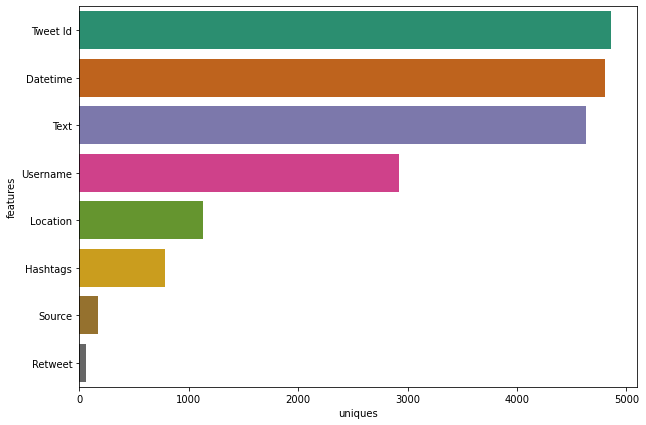

In [14]:
def unique_features(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['uniques'] = uniques
    return unique_dataframe
features = unique_features(df)
#print(features)
plt.figure(figsize=(10,7))
features = features.sort_values(by='uniques',ascending=False)
sns.barplot(x='uniques',y='features',data=features,palette='Dark2')

In [16]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
def tweet_per_day(data):
    return df['Text'].groupby(df['Datetime'].dt.date).count()

tweet_per_day(df)

Datetime
2008-09-07    1
2009-03-04    1
2009-03-19    1
2009-03-20    1
2009-03-27    1
             ..
2022-11-15    3
2022-11-16    4
2022-11-18    1
2022-11-22    2
2022-11-23    1
Name: Text, Length: 2079, dtype: int64

In [17]:
print('Folowing are the top 10 tweeted days:')
print(df['Text'].groupby(df['Datetime'].dt.date).count().nlargest(10))

Folowing are the top 10 tweeted days:
Datetime
2017-03-12    67
2014-06-06    61
2018-05-29    32
2022-07-28    31
2015-07-17    30
2013-09-12    29
2020-08-20    29
2020-08-23    29
2017-06-08    28
2018-06-01    25
Name: Text, dtype: int64


In [18]:
df['only_date'] = pd.to_datetime(df['Datetime']).dt.date
df['created_year'] = df['Datetime'].apply(lambda date : date.year)
df['created_month'] = df['Datetime'].apply(lambda date : date.month)
df['created_day'] = df['Datetime'].apply(lambda date : date.day)

In [19]:
#tweet_from_2018 = df[df['created_year'] == 2018]
tweet_from_2019 = df[df['created_year'] == 2019]
tweet_from_2020 = df[df['created_year'] == 2020]
tweet_from_2021 = df[df['created_year'] == 2021]
tweet_from_2022 = df[df['created_year'] == 2022]

#tweets_month_18 =  tweet_from_2018['created_month'].value_counts().to_frame().reset_index().rename(columns={'index':'month','created_month':'count'})   
tweets_month_19 =  tweet_from_2019['created_month'].value_counts().to_frame().reset_index().rename(columns={'index':'month','created_month':'count'})   
tweets_month_20 =  tweet_from_2020['created_month'].value_counts().to_frame().reset_index().rename(columns={'index':'month','created_month':'count'})   
tweets_month_21 =  tweet_from_2021['created_month'].value_counts().to_frame().reset_index().rename(columns={'index':'month','created_month':'count'})   
tweets_month_22 =  tweet_from_2022['created_month'].value_counts().to_frame().reset_index().rename(columns={'index':'month','created_month':'count'})   

#tweets_month_18 = tweets_month_18.sort_values('month',ascending=True)
tweets_month_19 = tweets_month_19.sort_values('month',ascending=True)
tweets_month_20 = tweets_month_20.sort_values('month',ascending=True)
tweets_month_21=  tweets_month_21.sort_values('month',ascending=True)
tweets_month_22=  tweets_month_22.sort_values('month',ascending=True)


fig=go.Figure()
#fig.add_trace(go.Scatter(x=tweets_month_18['month'], y=tweets_month_18['count'],
     #                    mode='markers+lines',marker_color='firebrick',
     #                    name='Year 2018',line = dict(color='blue', width=2, dash='dot')))

fig.add_trace(go.Scatter(x=tweets_month_19['month'], y=tweets_month_19['count'],
                         mode='markers+lines',marker_color='firebrick',
                         name='Year 2019',line = dict(color='grey', width=2, dash='dot')))

fig.update_layout(title_text='Tweets per Month in the year 2019,2020, 2021 & 2022 ',template="plotly", title_x=0.5)
fig.add_trace(go.Scatter(x=tweets_month_20['month'], y=tweets_month_20['count'],
                         mode='markers+lines',marker_color='darkred',name='Year 2020',
                        line=dict(color='orange', width=2,dash='longdashdot')))
fig.add_trace(go.Scatter(x=tweets_month_21['month'], y=tweets_month_21['count'],
                         mode='markers+lines',marker_color='firebrick',
                         name='Year 2021',line = dict(color='black', width=2, dash='dot')))
fig.add_trace(go.Scatter(x=tweets_month_22['month'], y=tweets_month_22['count'],
                         mode='markers+lines',marker_color='firebrick',
                         name='Year 2022',line = dict(color='green', width=2, dash='dot')))

fig.show()

In [20]:
hashtags = df.groupby('Hashtags').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
hashtags.style.background_gradient(cmap='Purples')

,Hashtags,Text
482,['SouthAfrica'],167
348,"['Property', 'hijacking']",136
369,"['RSA', 'SouthAfrica']",60
744,"['southafrica', 'southafricanews', 'mzansi', 'bitcoin', 'stockmarket']",27
651,"['hijacking', 'SouthAfrica']",23
749,['southafrica'],21
745,"['southafrica', 'southafricanews', 'mzansi']",17
768,"['travelling', 'SouthAfrica']",16
203,['Hijacking'],12
117,"['Dewani', 'SouthAfrica']",11


In [21]:
df= df[['Datetime', 'Text']]
df

,Datetime,Text
0,2022-11-23 12:48:29+00:00,SA has NEW hijacking hot-spot - and a 305% inc...
1,2022-11-22 19:27:52+00:00,@madiba_pinky @Reitu_d @Abramjee In South Afri...
2,2022-11-22 14:58:34+00:00,Thami Ngubeni Speaks After Scary Robbery &amp;...
3,2022-11-16 23:49:42+00:00,@VehicleTrackerz When we say majority of Zimba...
4,2022-11-16 13:10:12+00:00,"@RE_DailyMail South Africa, where you go to ge..."
...,...,...
4851,2011-11-23 10:02:55+00:00,Car hijack victim's nightmare. http://t.co/2Y...
4852,2011-11-17 10:28:13+00:00,DTN South Africa: Car hijack victim's nightmar...
4853,2010-09-09 06:37:41+00:00,Hijack suspect arrested aftr car chase:The 25-...
4854,2010-09-07 08:22:38+00:00,#dysfunctional #southafrica - Robbers hijack p...


In [22]:
x =  df['Text'].apply(len)
#df.Length.values
#x = [math.log10(i) for i in list(valorant_df.Length.values) if i!= 0]

fig = go.Figure(data=[go.Histogram(x=x,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5)])

fig.update_layout(title_text='Distribution of tweet lengths')
fig.show()

In [23]:
df['Word_counts'] =df['Text'].apply(lambda x:len(str(x).split()))
x = df.Word_counts.values
#x = [math.log10(i) for i in list(valorant_df.Length.values) if i!= 0]

fig = go.Figure(data=[go.Histogram(x=x,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue")])

fig.update_layout(title_text='Distribution of word counts')
fig.show()

# Data cleaning

###### 1. Clear of HTML characters
###### 2. Removing URLs, Hashtags and Styles
###### 3. Contraction Replacement
###### 4. Split attached word
###### 5. Normalize text
###### 6. Slang lookup
###### 7. Standardizing and Spell Check
###### 8. Remove Stopwords
###### 9. Remove Punctuations

In [27]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 4.6 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622381 sha256=7e5be99377e98d44d173f9efffbd9f9718798567a9bde3f1ba71db5479010199
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [28]:
import re
from cleantext import clean
from nltk.corpus import stopwords
import itertools
from autocorrect import Speller
from html.parser import HTMLParser
Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will","'d":" would","'ve":" have","'re":" are"}
#file = open("C:/Users/Pctec/Download/slang.txt", "r")
#slang=file.read()
def clean_data(text):
    text = HTMLParser().unescape(text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"^RT[\s]+", "", text)
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    for key,value in Apos_dict.items():
        if key in text:
            text=text.replace(key,value)
    text = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",text) if s])
    text = text.lower()
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    spell = Speller(lang='en')
    text=spell(text)

    return text
round1 = lambda x: clean_data(x)

In [29]:
df['Text'] = df['Text'].apply(lambda x:clean_data(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.



In [30]:
df

,Datetime,Text,Word_counts
0,2022-11-23 12:48:29+00:00,sa has new hijacking hotspot and a 305 increa...,36
1,2022-11-22 19:27:52+00:00,madibapinky rented abramjee in south afri...,27
2,2022-11-22 14:58:34+00:00,thai nguyen speaks after scary robbery h...,42
3,2022-11-16 23:49:42+00:00,vehicle tracker when we say majority of zimb...,37
4,2022-11-16 13:10:12+00:00,re daily mail south africa where you go to g...,37
...,...,...,...
4851,2011-11-23 10:02:55+00:00,car hijack victims nightmare south africa crime,7
4852,2011-11-17 10:28:13+00:00,don south africa car hijack victims nightma...,23
4853,2010-09-09 06:37:41+00:00,hijack suspect arrested after car chase the 25...,17
4854,2010-09-07 08:22:38+00:00,dysfunctional southafrica robbers hijack poli...,8


###### 10.Tokenization

In [31]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['Text_token']=df['Text'].apply(regexp.tokenize)
df.head(3)

,Datetime,Text,Word_counts,Text_token
0,2022-11-23 12:48:29+00:00,sa has new hijacking hotspot and a 305 increa...,36,"[sa, has, new, hijacking, hotspot, and, a, 305..."
1,2022-11-22 19:27:52+00:00,madibapinky rented abramjee in south afri...,27,"[madibapinky, rented, abramjee, in, south, afr..."
2,2022-11-22 14:58:34+00:00,thai nguyen speaks after scary robbery h...,42,"[thai, nguyen, speaks, after, scary, robbery, ..."


###### 11. Remove stop words

In [32]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['ect','the','a']
stopwords.extend(my_stopwords)
df['Text_token'] = df['Text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Datetime,Text,Word_counts,Text_token
0,2022-11-23 12:48:29+00:00,sa has new hijacking hotspot and a 305 increa...,36,"[sa, new, hijacking, hotspot, 305, increase, a..."
1,2022-11-22 19:27:52+00:00,madibapinky rented abramjee in south afri...,27,"[madibapinky, rented, abramjee, south, africa,..."
2,2022-11-22 14:58:34+00:00,thai nguyen speaks after scary robbery h...,42,"[thai, nguyen, speaks, scary, robbery, hijacki..."


###### 12. Remove infrequent words

In [33]:
#keep only words which are longer than 2 letters
df['Text_string'] = df['Text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [34]:
all_words = ' '.join([word for word in df['Text_string']])

In [35]:
nltk.download('punkt')
tokenized_words = nltk.tokenize.word_tokenize(all_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [36]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'south': 5045, 'africa': 5001, 'hijacking': 4607, 'crime': 711, 'car': 694, 'hijack': 367, 'cars': 335, 'via': 331, 'vehicle': 310, 'people': 296, ...})

In [37]:
#drop words which occur less than a certain amount of times (usually we use a value of 3 or 4).
df['Text_string_fdist']=df['Text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item]>=3]))

##### 13.Lemmatization

In [38]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

wordnet_lem = WordNetLemmatizer()

df['Text_string_lem'] = df['Text_string_fdist'].apply(wordnet_lem.lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [39]:
df

,Datetime,Text,Word_counts,Text_token,Text_string,Text_string_fdist,Text_string_lem
0,2022-11-23 12:48:29+00:00,sa has new hijacking hotspot and a 305 increa...,36,"[sa, new, hijacking, hotspot, 305, increase, a...",new hijacking hotspot 305 increase area crime ...,new hijacking hotspot increase area crime stat...,new hijacking hotspot increase area crime stat...
1,2022-11-22 19:27:52+00:00,madibapinky rented abramjee in south afri...,27,"[madibapinky, rented, abramjee, south, africa,...",madibapinky rented abramjee south africa sis l...,abramjee south africa lost loved one april sus...,abramjee south africa lost loved one april sus...
2,2022-11-22 14:58:34+00:00,thai nguyen speaks after scary robbery h...,42,"[thai, nguyen, speaks, scary, robbery, hijacki...",thai nguyen speaks scary robbery hijacking hij...,thai speaks scary robbery hijacking hijacking ...,thai speaks scary robbery hijacking hijacking ...
3,2022-11-16 23:49:42+00:00,vehicle tracker when we say majority of zimb...,37,"[vehicle, tracker, say, majority, zimbabwe, so...",vehicle tracker say majority zimbabwe south af...,vehicle tracker say majority zimbabwe south af...,vehicle tracker say majority zimbabwe south af...
4,2022-11-16 13:10:12+00:00,re daily mail south africa where you go to g...,37,"[daily, mail, south, africa, go, get, killed, ...",daily mail south africa get killed raped nothi...,daily mail south africa get killed raped nothi...,daily mail south africa get killed raped nothi...
...,...,...,...,...,...,...,...
4851,2011-11-23 10:02:55+00:00,car hijack victims nightmare south africa crime,7,"[car, hijack, victims, nightmare, south, afric...",car hijack victims nightmare south africa crime,car hijack victims nightmare south africa crime,car hijack victims nightmare south africa crime
4852,2011-11-17 10:28:13+00:00,don south africa car hijack victims nightma...,23,"[south, africa, car, hijack, victims, nightmar...",south africa car hijack victims nightmare feel...,south africa car hijack victims nightmare feel...,south africa car hijack victims nightmare feel...
4853,2010-09-09 06:37:41+00:00,hijack suspect arrested after car chase the 25...,17,"[hijack, suspect, arrested, car, chase, 25year...",hijack suspect arrested car chase 25yearly man...,hijack suspect arrested car chase man arrested...,hijack suspect arrested car chase man arrested...
4854,2010-09-07 08:22:38+00:00,dysfunctional southafrica robbers hijack poli...,8,"[dysfunctional, southafrica, robbers, hijack, ...",dysfunctional southafrica robbers hijack polic...,southafrica robbers hijack police car,southafrica robbers hijack police car


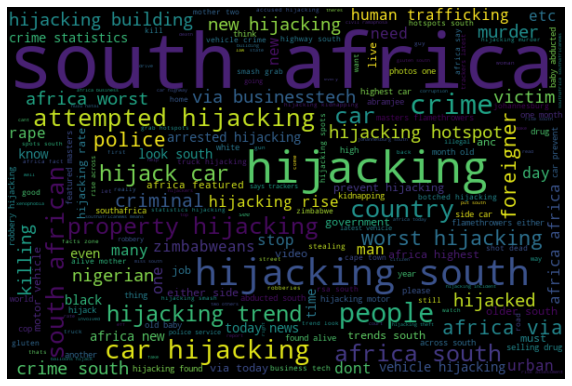

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
all_words_lem = ' '.join([word for word in df['Text_string_lem']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

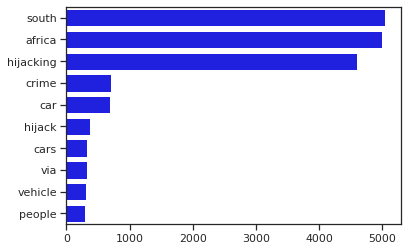

In [41]:
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [42]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['lem']=df['Text_string_lem'].apply(regexp.tokenize)


In [43]:
from collections import Counter
#df['temp_list'] = df['Text_token'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['lem'] for item in sublist])
temp1 = pd.DataFrame(top.most_common(20))
temp1.columns = ['Common_words after cleaning','count']
temp1.style.background_gradient(cmap='Blues')

,Common_words after lemmetization,count
0,south,5045
1,africa,5001
2,hijacking,4607
3,crime,711
4,car,694
5,hijack,367
6,cars,335
7,via,331
8,vehicle,310
9,people,296


In [45]:
import plotly.express as px
fig = px.treemap(temp1, path=['Common_words after cleaning'], values='count',title='Tree of Most Common Words')
fig.show()